## Problem Statement - Process and analyze the public data provided by SBA.gov for each US state toextract meaningful insights from features in the dataset

### Index for insights
1. State Average Versus National Average
2. Number of PPP Loans by Year
3. Checking Loan Status
4.How many people mention their gender
5. Count with Business age
6. Distribution for Rural and Urban area
7. Plotting distribution of loan approved
8. Check the distribution of loan terms
9. Distribution of loan forgiveness amounts
10. State wise analysis
11. City wise
12. Zipcode wise
13. Popular business types
14. Loan amount approved for gender
15. How often do people include their races/gender/veteran statuses in their applications?
16. Most common lenders
17. Jobs reported with each state
18. ProcessingMethod
19. Correlation between the number of jobs retained and the loan amount
20. How the number of approval changes over time
21. Distribution of PPP for each Project Congressional district
22. Project States
23. Money borrowed with different ethnicity
24. Money borrowed with different race
25. Money borrowed with veteran status
26. Average loan amount by borrower NAICS code
27. Average loan amount by borrower SBA Office Code
28. Ethnicity and gender wise amount approved
29. Loan amount distribution for loans above and below $150,000
30. Data grouped by project state and loan amount to find loan amount distribution
31. Data grouped by project state and loan amount to find loan lending frequency
32. Loan distribution for loans with and without forgiveness
33. Relationship between loan amount and jobs reported
34. Relationship between loan amount and forgiveness amount

#### Importing important libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('public_150k_plus_230101.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [5]:
df.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
       'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
       'OriginatingLender', 'Originatin

In [6]:
df.shape

(968531, 53)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               942818 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

#### Loan Number

In [8]:
df['LoanNumber'].isna().sum()

0

#### Date Approved

In [9]:
df['DateApproved'].isna().sum()

0

In [10]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

In [11]:
#Earliest date approved
print('Earliest date approved: ',df['DateApproved'].dt.date.min())
#Most recent date approved
print('Most recent date approved: ',df['DateApproved'].dt.date.max())

Earliest date approved:  2020-04-03
Most recent date approved:  2021-07-19


In [12]:
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  25713
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [13]:
100*(df.isnull().sum()/len(df)).sort_values(ascending=False)

REFINANCE_EIDL_PROCEED         97.640241
DEBT_INTEREST_PROCEED          96.725247
FranchiseName                  96.344464
MORTGAGE_INTEREST_PROCEED      95.231645
HEALTH_CARE_PROCEED            94.068749
NonProfit                      93.873092
RENT_PROCEED                   89.723303
UTILITIES_PROCEED              64.959614
ForgivenessDate                 3.060924
ForgivenessAmount               3.060924
LoanStatusDate                  2.654845
NAICSCode                       0.684335
PAYROLL_PROCEED                 0.189152
BusinessType                    0.074546
ProjectCountyName               0.005885
UndisbursedAmount               0.004853
CD                              0.004749
BorrowerAddress                 0.001445
ProjectZip                      0.001445
ProjectCity                     0.001342
BorrowerState                   0.001342
BorrowerZip                     0.001342
BorrowerCity                    0.001239
ProjectState                    0.000929
BorrowerName    

<AxesSubplot:>

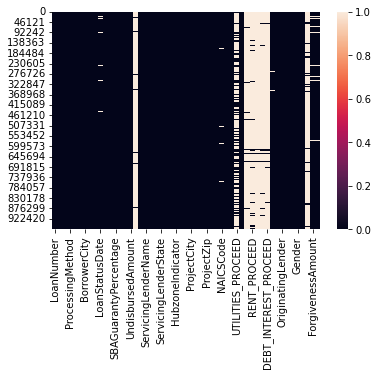

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.shape

(968531, 53)

In [16]:
df['InitialApprovalAmount'].sum()

515504168175.31976

In [17]:
df['CurrentApprovalAmount'].sum()

513923942366.2598

In [18]:
df['BorrowerState'].value_counts().count()

56

In [19]:
num_cols = [i for i in df.columns if df[i].dtype != 'object']
num_cols

['LoanNumber',
 'DateApproved',
 'SBAOfficeCode',
 'Term',
 'SBAGuarantyPercentage',
 'InitialApprovalAmount',
 'CurrentApprovalAmount',
 'UndisbursedAmount',
 'ServicingLenderLocationID',
 'JobsReported',
 'NAICSCode',
 'UTILITIES_PROCEED',
 'PAYROLL_PROCEED',
 'MORTGAGE_INTEREST_PROCEED',
 'RENT_PROCEED',
 'REFINANCE_EIDL_PROCEED',
 'HEALTH_CARE_PROCEED',
 'DEBT_INTEREST_PROCEED',
 'OriginatingLenderLocationID',
 'ForgivenessAmount']

In [20]:
num_cols = ["SBAGuarantyPercentage", "InitialApprovalAmount", "CurrentApprovalAmount", "UndisbursedAmount", "ForgivenessAmount"]

In [21]:
# Get summary statistics for numeric columns
df[["SBAGuarantyPercentage", "InitialApprovalAmount", "CurrentApprovalAmount", "UndisbursedAmount", "ForgivenessAmount"]].describe()

,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ForgivenessAmount
count,968531.0,9.685310e+05,9.685310e+05,9.684840e+05,9.388850e+05
mean,100.0,5.322537e+05,5.306221e+05,1.515947e+01,5.285127e+05
std,0.0,7.442514e+05,7.378871e+05,4.109778e+03,7.315001e+05
min,100.0,0.000000e+00,1.500000e+05,0.000000e+00,1.000000e-02
25%,100.0,2.002000e+05,2.004000e+05,0.000000e+00,2.008463e+05
50%,100.0,2.951770e+05,2.950000e+05,0.000000e+00,2.951752e+05
75%,100.0,5.402000e+05,5.393843e+05,0.000000e+00,5.399421e+05
max,100.0,1.000000e+07,1.000000e+07,2.400000e+06,1.026528e+07


## Insights with visualisation

### Distribution of numerical features

Checking Distribution for SBAGuarantyPercentage


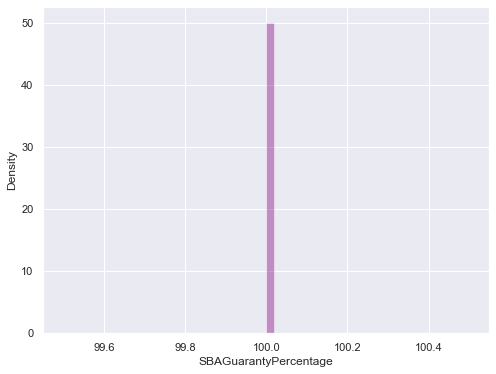

Mean of Age SBAGuarantyPercentage: ,100.0
Median of SBAGuarantyPercentage is: ,100.0
Mode of Age SBAGuarantyPercentage is: ,0    100
dtype: int64
**************************************************
Checking Distribution for InitialApprovalAmount


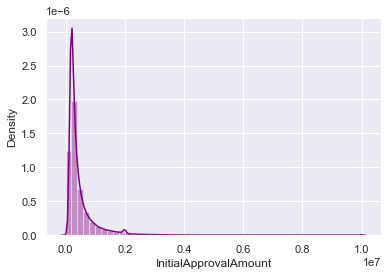

Mean of Age InitialApprovalAmount: ,532253.6585564105
Median of InitialApprovalAmount is: ,295177.0
Mode of Age InitialApprovalAmount is: ,0    150000.0
dtype: float64
**************************************************
Checking Distribution for CurrentApprovalAmount


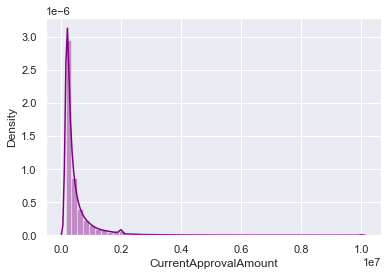

Mean of Age CurrentApprovalAmount: ,530622.0888812447
Median of CurrentApprovalAmount is: ,295000.0
Mode of Age CurrentApprovalAmount is: ,0    150000.0
dtype: float64
**************************************************
Checking Distribution for UndisbursedAmount


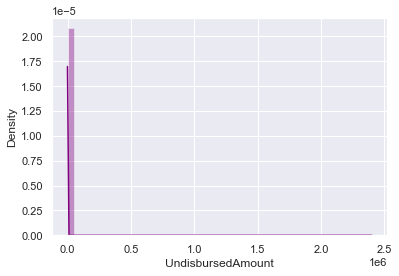

Mean of Age UndisbursedAmount: ,15.159474002668087
Median of UndisbursedAmount is: ,0.0
Mode of Age UndisbursedAmount is: ,0    0.0
dtype: float64
**************************************************
Checking Distribution for ForgivenessAmount


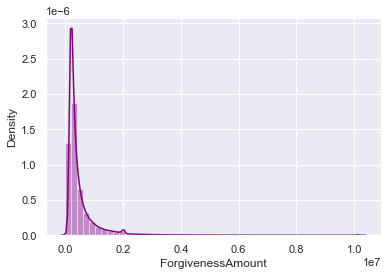

Mean of Age ForgivenessAmount: ,528512.6854951959
Median of ForgivenessAmount is: ,295175.16
Mode of Age ForgivenessAmount is: ,0    150830.14
dtype: float64
**************************************************


In [22]:
# Check the distribution of loan amounts
sns.set()
plt.figure(figsize=(8,6))
for i in num_cols:
    print(f'Checking Distribution for {i}')
    sns.distplot(df[i],color='purple')
    plt.show()
    print(f'Mean of Age {i}: ,{df[i].mean()}')
    print(f'Median of {i} is: ,{df[i].median()}')
    print(f'Mode of Age {i} is: ,{df[i].mode()}')
    print('*'*50)

### 1. State Average Versus National Average

In [23]:
nat_dict = {'NationWise avg loan amount':np.repeat(df['InitialApprovalAmount'].mean(),56,axis=0)}
nat_df = pd.DataFrame(nat_dict)

In [24]:
temp_df = pd.DataFrame(df.groupby('ProjectState')['InitialApprovalAmount'].mean()).reset_index()
temp_df.rename(columns={'InitialApprovalAmount':'Statewise avg loan amount','ProjectState':'State'},inplace=True)
temp_df = pd.concat([temp_df,nat_df],axis=1)
temp_df.head()

,State,Statewise avg loan amount,NationWise avg loan amount
0,AK,495245.131698,532253.658556
1,AL,512918.056891,532253.658556
2,AR,475332.257432,532253.658556
3,AS,281854.616500,532253.658556
4,AZ,515149.012046,532253.658556


### 2. Number of PPP Loans by Year

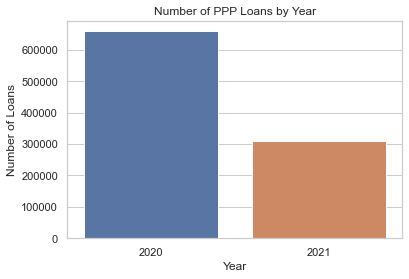

In [25]:
sns.set_style("whitegrid")

sns.countplot(x=df['DateApproved'].dt.year, data=df)
plt.title('Number of PPP Loans by Year')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.show()

Small businesses were hit hard by the pandemic: The large number of loans given out in 2020 indicates the scale of the economic impact of the pandemic on small businesses.

### 3. Checking Loan Status

In [26]:
# Check the loan status distribution
df["LoanStatus"].value_counts()

Paid in Full           930850
Exemption 4             25713
Charged Off             11954
Active Un-Disbursed        14
Name: LoanStatus, dtype: int64

In [27]:
# Check the top loan amounts by loan status
df.groupby("LoanStatus")["CurrentApprovalAmount"].max().sort_values(ascending=False)

LoanStatus
Charged Off            10000000.0
Exemption 4            10000000.0
Paid in Full           10000000.0
Active Un-Disbursed     2400000.0
Name: CurrentApprovalAmount, dtype: float64

### 4. How many people mention their gender

col_0          count
Gender              
Female Owned   72580
Male Owned    314225
Unanswered    581726


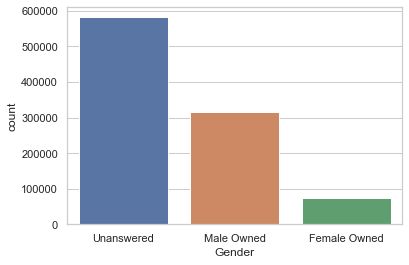

In [28]:
# Frequency table for categorical variables
freq_table = pd.crosstab(index=df['Gender'], columns="count")
print(freq_table)

# Bar plot for categorical variables
sns.countplot(x='Gender', data=df)
plt.show()

### 5. Count with Business age

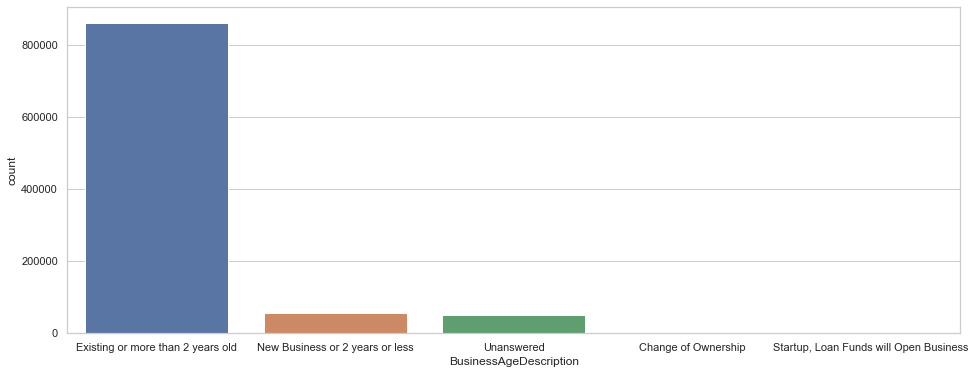

In [29]:
plt.figure(figsize=(16,6))
sns.countplot(df['BusinessAgeDescription'])
plt.show()

In [30]:
df['InitialApprovalAmount'].sum()/10**9

515.5041681753198

Total 485 billion lended

### 6. Distribution for Rural and Urban area

<AxesSubplot:xlabel='RuralUrbanIndicator', ylabel='count'>

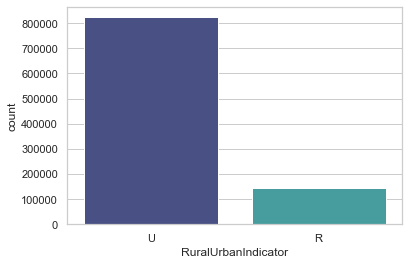

In [31]:
sns.countplot(df['RuralUrbanIndicator'],palette='mako')

Text(0.5, 0, 'Loan Amount')

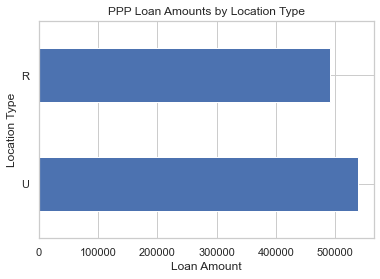

In [32]:
(df.groupby('RuralUrbanIndicator')['CurrentApprovalAmount'].mean()).sort_values(ascending=False).plot(kind='barh')
plt.title('PPP Loan Amounts by Location Type')
plt.ylabel('Location Type')
plt.xlabel('Loan Amount')

### 7. Plotting distribution of loan approved

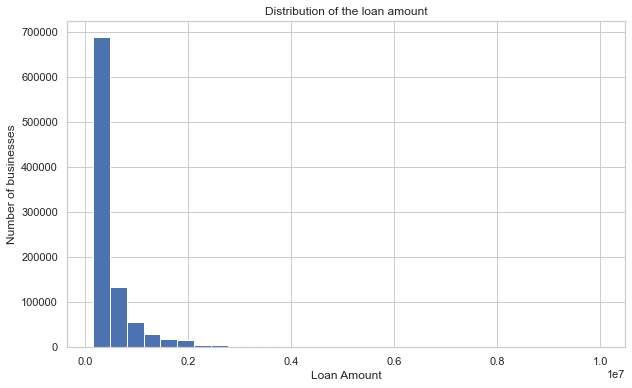

In [33]:
plt.figure(figsize=(10,6))
df['CurrentApprovalAmount'].plot(kind='hist', bins=30)
plt.xlabel('Loan Amount')
plt.ylabel('Number of businesses')
plt.title('Distribution of the loan amount')
plt.show()

We see that this distribution has long tail

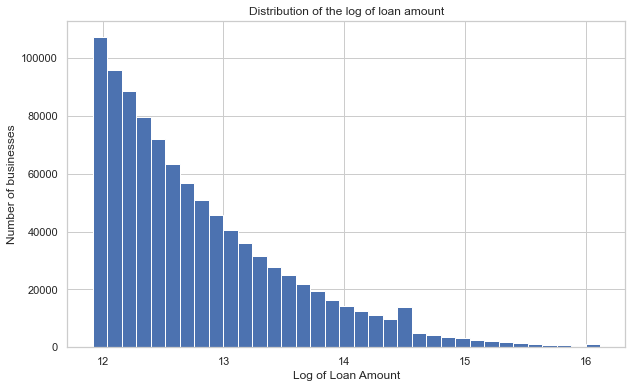

In [34]:
plt.figure(figsize=(10,6))
(df['CurrentApprovalAmount'].apply(lambda x: math.log(x))).plot(kind='hist', bins=35)
plt.xlabel('Log of Loan Amount')
plt.ylabel('Number of businesses')
plt.title('Distribution of the log of loan amount')
plt.show()

### 8. Check the distribution of loan terms

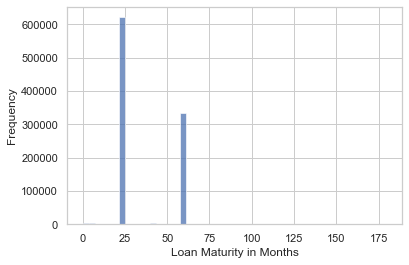

In [35]:
# Check the distribution of loan terms
import seaborn as sns

sns.histplot(data=df, x="Term", bins=50)
plt.xlabel("Loan Maturity in Months")
plt.ylabel("Frequency")
plt.show()

### 9. Distribution of loan forgiveness amounts

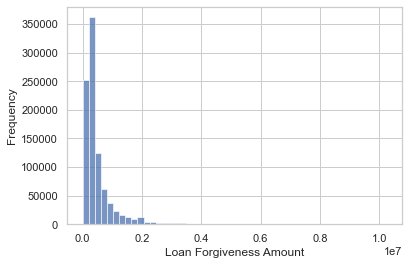

In [36]:
# Check the distribution of loan forgiveness amounts
sns.histplot(data=df, x="ForgivenessAmount", bins=50)
plt.xlabel("Loan Forgiveness Amount")
plt.ylabel("Frequency")
plt.show()

### 10. State wise analysis

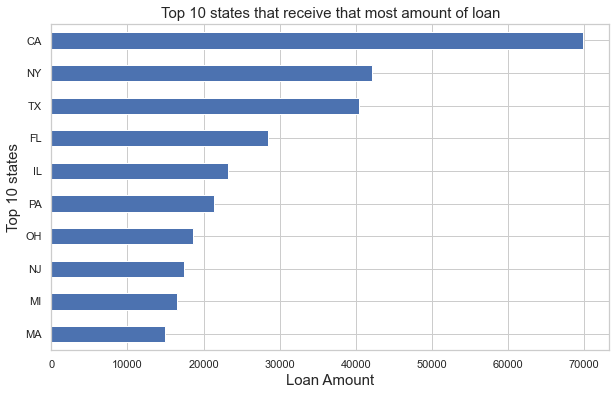

In [37]:
plt.figure(figsize=(10,6))
((df.groupby('BorrowerState')['InitialApprovalAmount'].sum()/10**6).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan Amount',fontsize=15)
plt.ylabel('Top 10 states',fontsize=15)
plt.title('Top 10 states that receive that most amount of loan',fontsize=15)
plt.show()

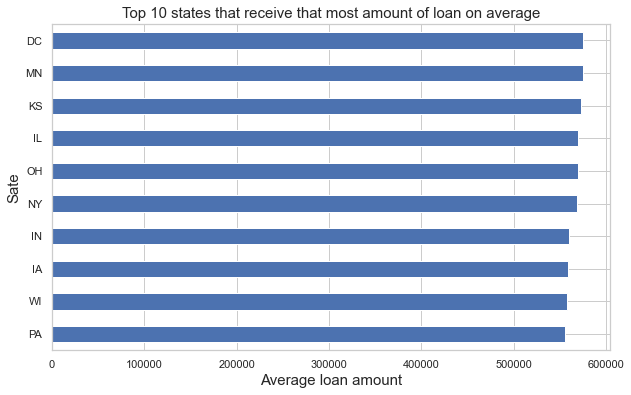

In [38]:
plt.figure(figsize=(10,6))
((df.groupby('BorrowerState')['InitialApprovalAmount'].mean()).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Average loan amount',fontsize=15)
plt.ylabel('Sate',fontsize=15)
plt.title('Top 10 states that receive that most amount of loan on average',fontsize=15)
plt.show()

In [39]:
# Check the loan approval rate by state
count_of_states = df["BorrowerState"].value_counts()
count_of_approval = df[df["LoanStatus"] == "Paid in Full"].groupby("BorrowerState")["LoanStatus"].count()
rate_of_approval = count_of_approval / count_of_states
rate_of_approval.sort_values(inplace=True, ascending=False)
rate_of_approval.head(5)

SD    0.992579
IA    0.992526
NE    0.991558
ME    0.988530
KS    0.988417
dtype: float64

### 11. City wise

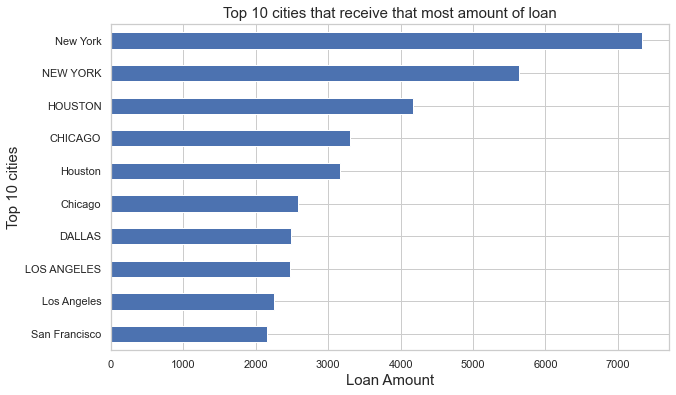

In [40]:
plt.figure(figsize=(10,6))
((df.groupby('BorrowerCity')['CurrentApprovalAmount'].sum()/10**6).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan Amount',fontsize=15)
plt.ylabel('Top 10 cities',fontsize=15)
plt.title('Top 10 cities that receive that most amount of loan',fontsize=15)
plt.show()

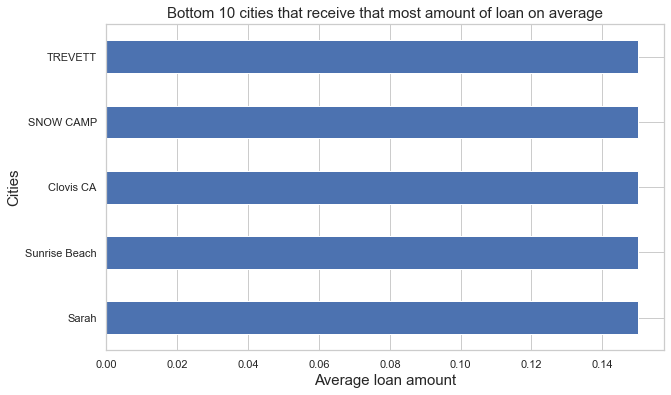

In [41]:
plt.figure(figsize=(10,6))
((df.groupby('BorrowerCity')['CurrentApprovalAmount'].sum()/10**6).sort_values(ascending=False)).tail(5).sort_values().plot(kind='barh')
plt.xlabel('Average loan amount',fontsize=15)
plt.ylabel('Cities',fontsize=15)
plt.title('Bottom 10 cities that receive that most amount of loan on average',fontsize=15)
plt.show()

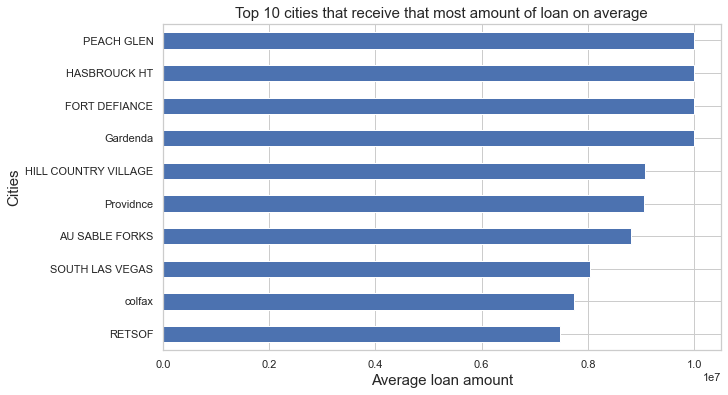

In [42]:
plt.figure(figsize=(10,6))
((df.groupby('BorrowerCity')['CurrentApprovalAmount'].mean()).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Average loan amount',fontsize=15)
plt.ylabel('Cities',fontsize=15)
plt.title('Top 10 cities that receive that most amount of loan on average',fontsize=15)
plt.show()

#### City wise distribution of Business granted loans

In [43]:
loan_grant_bus = df[df['NonProfit'] != 'Y']

In [44]:
bus_df = pd.DataFrame(loan_grant_bus.groupby('OriginatingLenderCity')['BusinessType'].count()).reset_index()
bus_df.rename(columns ={'BusinessType':'No_of_BusinessGrantedLoans'},inplace=True)
bus_df = bus_df.sort_values(by='No_of_BusinessGrantedLoans',ascending=False)[:10]

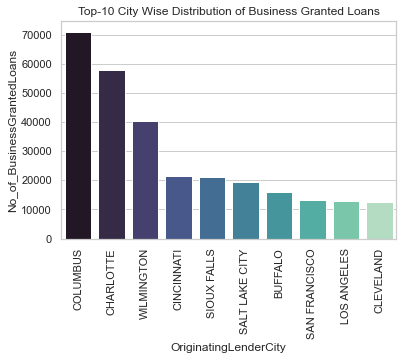

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x='OriginatingLenderCity',y='No_of_BusinessGrantedLoans',data=bus_df,palette='mako')
plt.title("Top-10 City Wise Distribution of Business Granted Loans")
plt.xticks(rotation=90)
plt.show()

### 12. Zipcode wise

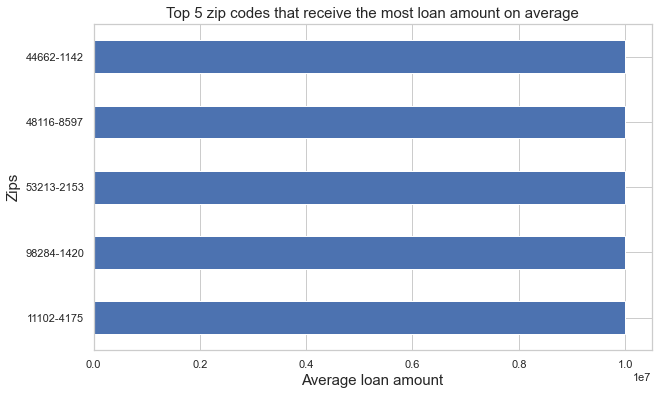

In [46]:
plt.figure(figsize=(10,6))
((df.groupby('BorrowerZip')['CurrentApprovalAmount'].mean()).sort_values(ascending=False)).head(5).sort_values().plot(kind='barh')
plt.xlabel('Average loan amount',fontsize=15)
plt.ylabel('Zips',fontsize=15)
plt.title('Top 5 zip codes that receive the most loan amount on average',fontsize=15)
plt.show()

### Cities with highest avergae loan UndisbursedAmount

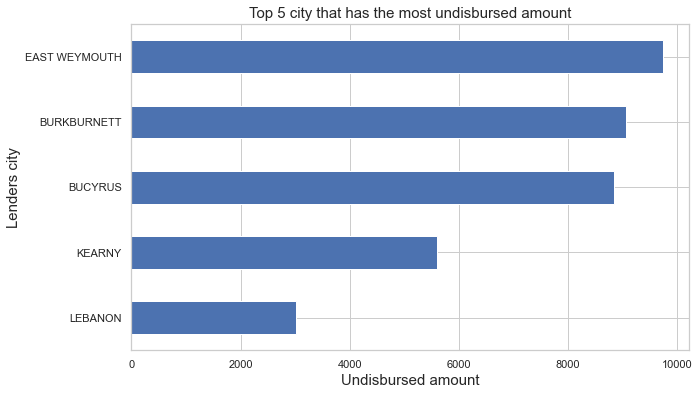

In [47]:
plt.figure(figsize=(10,6))
((df.groupby('ServicingLenderCity')['UndisbursedAmount'].mean()).sort_values(ascending=False)).head(5).sort_values().plot(kind='barh')
plt.xlabel('Undisbursed amount',fontsize=15)
plt.ylabel('Lenders city',fontsize=15)
plt.title('Top 5 city that has the most undisbursed amount',fontsize=15)
plt.show()

### 13. Popular business types

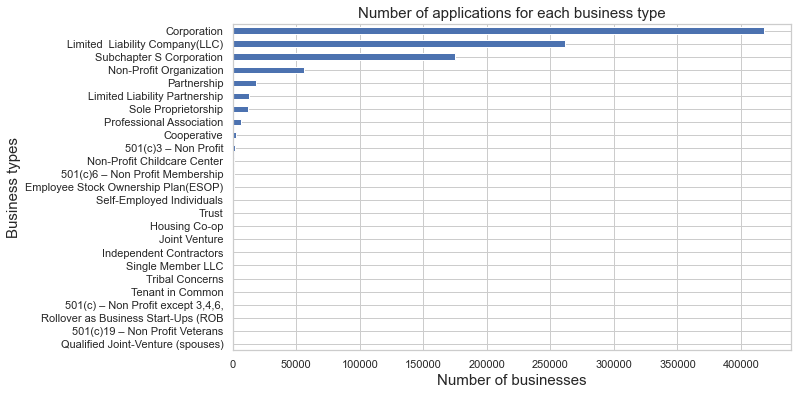

In [48]:
plt.figure(figsize=(10,6))
(df['BusinessType'].value_counts()).sort_values().plot(kind='barh')
plt.xlabel('Number of businesses',fontsize=15)
plt.ylabel('Business types',fontsize=15)
plt.title('Number of applications for each business type',fontsize=15)
plt.show()

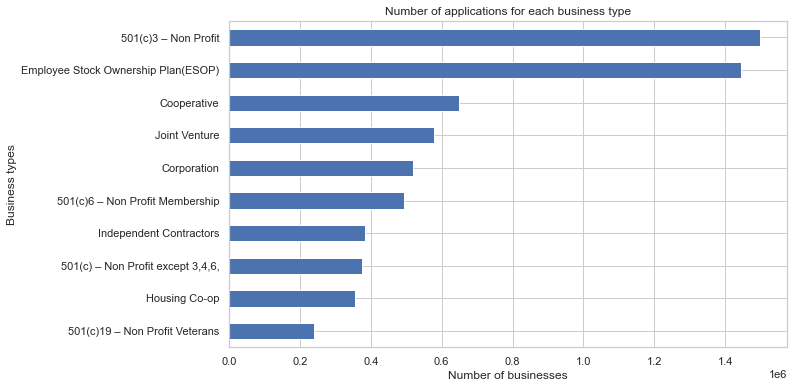

In [49]:
plt.figure(figsize=(10,6))
(df.groupby('BusinessType')['CurrentApprovalAmount'].mean()).head(10).sort_values().plot(kind='barh')
plt.xlabel('Number of businesses')
plt.ylabel('Business types')
plt.title('Number of applications for each business type')
plt.show()

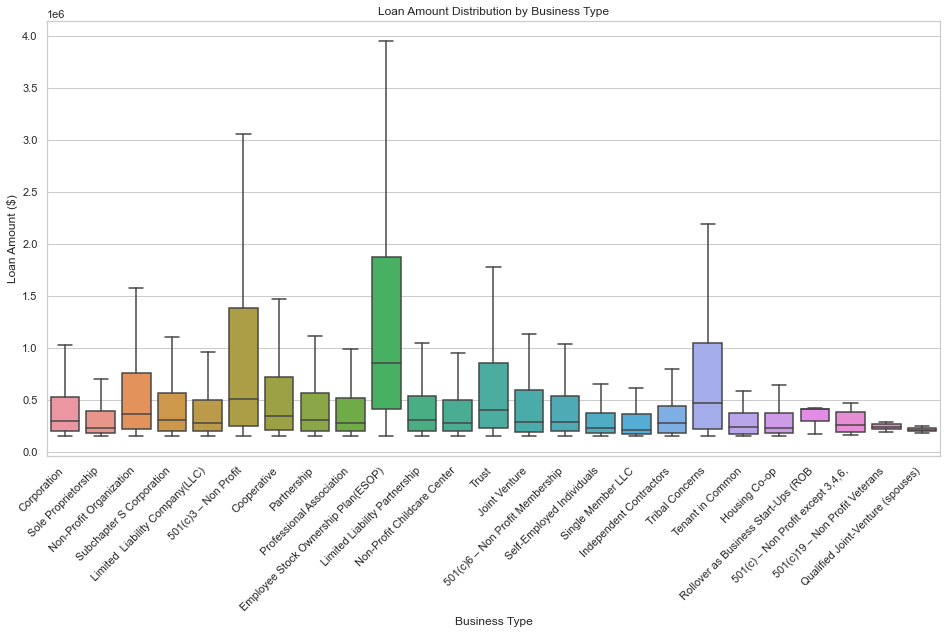

In [50]:
plt.figure(figsize=(16,8))
sns.boxplot(x='BusinessType', y='CurrentApprovalAmount', data=df, showfliers=False)
plt.title('Loan Amount Distribution by Business Type')
plt.xlabel('Business Type')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

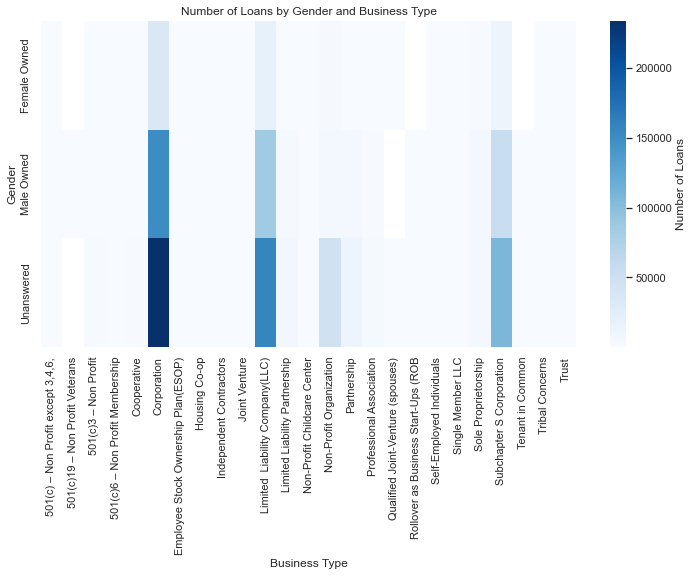

In [51]:
# Group by State and Business Type and count the number of loans
gender_business_type_loan_count = df.groupby(['Gender', 'BusinessType'])['CurrentApprovalAmount'].count().reset_index()

pivot_gender_business_type_loan_count = gender_business_type_loan_count.pivot(index='Gender', columns='BusinessType', values='CurrentApprovalAmount')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_gender_business_type_loan_count, cmap='Blues', fmt='.0f', cbar_kws={'label': 'Number of Loans'})
plt.title('Number of Loans by Gender and Business Type')
plt.xlabel('Business Type')
plt.ylabel('Gender')
plt.show()

In [52]:
approval_rates_by_business = df[df["LoanStatus"] == "Paid in Full"].groupby("BusinessType")["LoanStatus"].count() / df["BusinessType"].value_counts()
approval_rates_by_business.sort_values(inplace=True, ascending=False)
approval_rates_by_business.head(5)

501(c) – Non Profit except 3,4,6,      1.000000
Qualified Joint-Venture (spouses)      1.000000
Tribal Concerns                        1.000000
Rollover as Business Start-Ups (ROB    1.000000
Non-Profit Childcare Center            0.992222
dtype: float64

### 14. Loan amount approved for gender

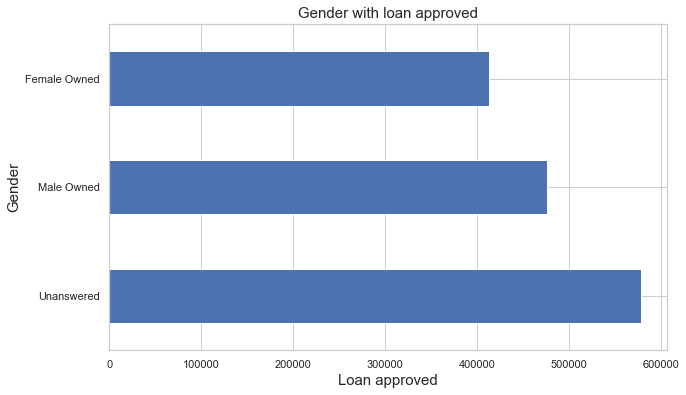

In [53]:
plt.figure(figsize=(10,6))
(df.groupby("Gender")["InitialApprovalAmount"].mean().sort_values(ascending=False).plot(kind='barh'))
plt.xlabel('Loan approved',fontsize=15)
plt.ylabel('Gender',fontsize=15)
plt.title('Gender with loan approved',fontsize=15)
plt.show()

<AxesSubplot:ylabel='CurrentApprovalAmount'>

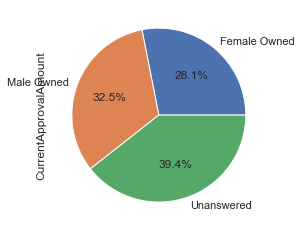

In [54]:
df.groupby('Gender')['CurrentApprovalAmount'].mean().plot.pie(autopct='%1.1f%%')

### 15. Loan amount by race/Ethnicity/Veteran

### Race

In [55]:
df['Race'].value_counts()

Unanswered                                   773611
White                                        158990
Asian                                         21621
Black or African American                      7493
American Indian or Alaska Native               6124
Native Hawaiian or Other Pacific Islander       655
Puerto Rican                                     31
Multi Group                                       5
Eskimo & Aleut                                    1
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

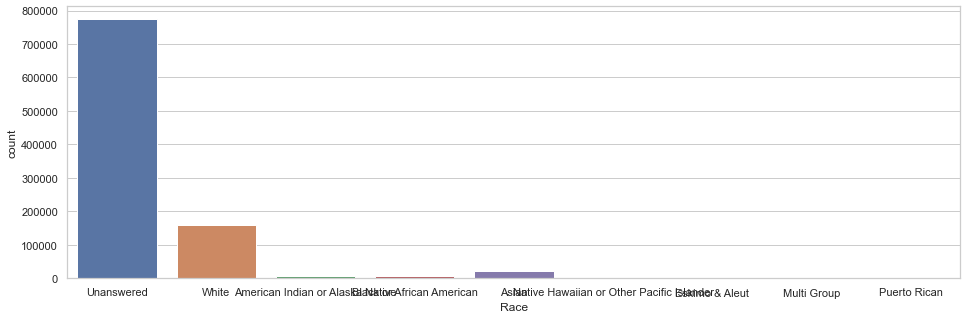

In [56]:
plt.figure(figsize=(16,5))
sns.countplot(df['Race'])

In [57]:
race_df = pd.DataFrame(df.groupby('Race')['InitialApprovalAmount'].mean()).reset_index()
race_df = race_df.sort_values(by='InitialApprovalAmount',ascending=False)

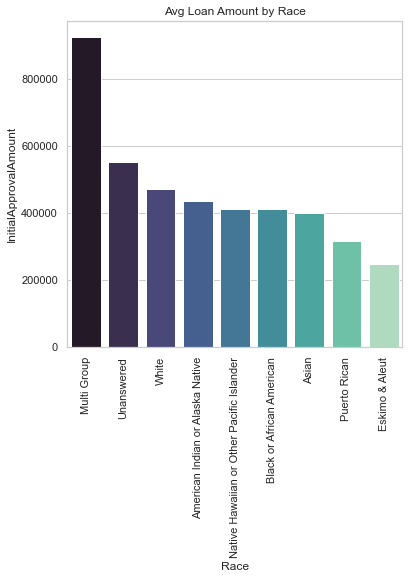

In [58]:
plt.figure(figsize=(6,6))
sns.barplot(x='Race',y='InitialApprovalAmount',data=race_df,palette='mako')
plt.title("Avg Loan Amount by Race")
plt.xticks(rotation=90)
plt.show()

Mostly are from Multi group status

### Loan Amount Vs Ethnicity

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

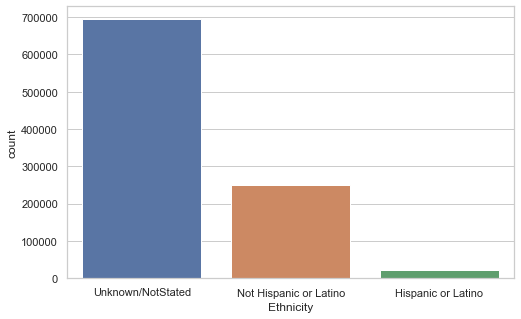

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(df['Ethnicity'])

In [60]:
eth_df = pd.DataFrame(df.groupby('Ethnicity')['InitialApprovalAmount'].mean()).reset_index()
eth_df = eth_df.sort_values(by='InitialApprovalAmount',ascending=False)

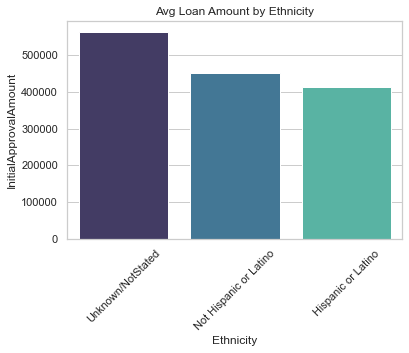

In [61]:
plt.figure(figsize=(6,4))
sns.barplot(x='Ethnicity',y='InitialApprovalAmount',data=eth_df,palette='mako')
plt.title("Avg Loan Amount by Ethnicity")
plt.xticks(rotation=45)
plt.show()

### Loan Amount Vs Veteran

<AxesSubplot:xlabel='Veteran', ylabel='count'>

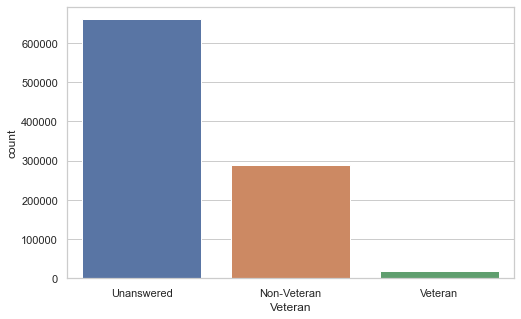

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(df['Veteran'])

In [63]:
vet_df = pd.DataFrame(df.groupby('Veteran')['InitialApprovalAmount'].mean()).reset_index()
vet_df = vet_df.sort_values(by='InitialApprovalAmount',ascending=False)

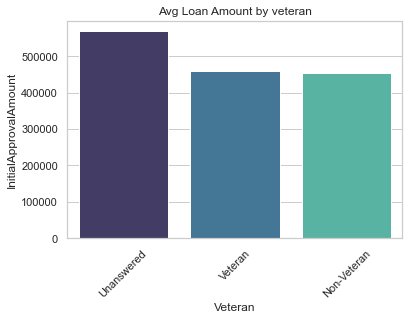

In [64]:
plt.figure(figsize=(6,4))
sns.barplot(x='Veteran',y='InitialApprovalAmount',data=vet_df,palette='mako')
plt.title("Avg Loan Amount by veteran")
plt.xticks(rotation=45)
plt.show()

### 16. Most common lenders

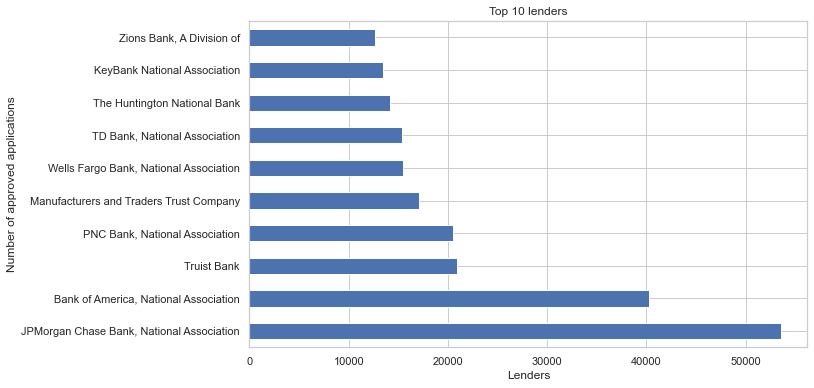

In [65]:
df['OriginatingLender'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('Lenders')
plt.ylabel('Number of approved applications')
plt.title('Top 10 lenders')
plt.show()

Text(0.5, 1.0, 'Total loan amount lend by bank')

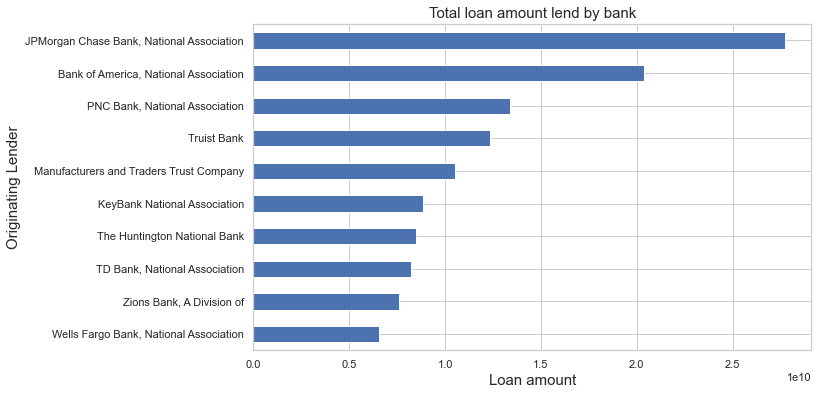

In [66]:
# most lending bank
plt.figure(figsize=(10,6))
((df.groupby('OriginatingLender')['CurrentApprovalAmount'].sum()).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('Originating Lender',fontsize=15)
plt.title('Total loan amount lend by bank',fontsize=15)

Text(0.5, 1.0, 'Average loan amount lend by bank')

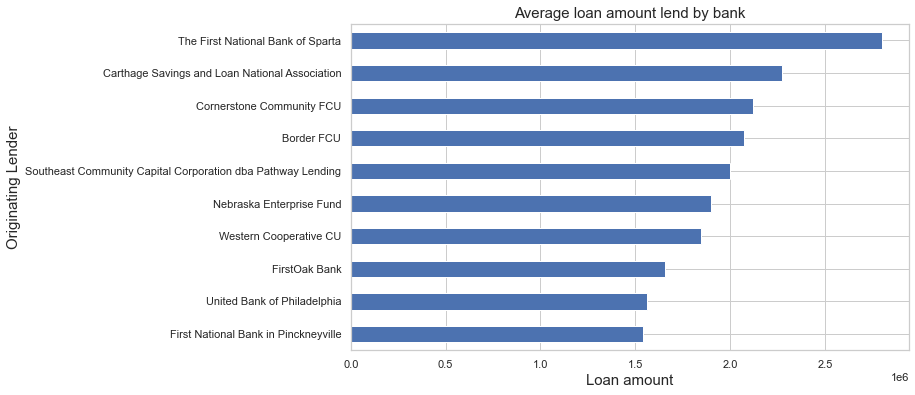

In [67]:
# most lending bank
plt.figure(figsize=(10,6))
((df.groupby('OriginatingLender')['CurrentApprovalAmount'].mean()).sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('Originating Lender',fontsize=15)
plt.title('Average loan amount lend by bank',fontsize=15)

### 17. Jobs reported with each state

<AxesSubplot:title={'center':'Distribution of JobsReported'}>

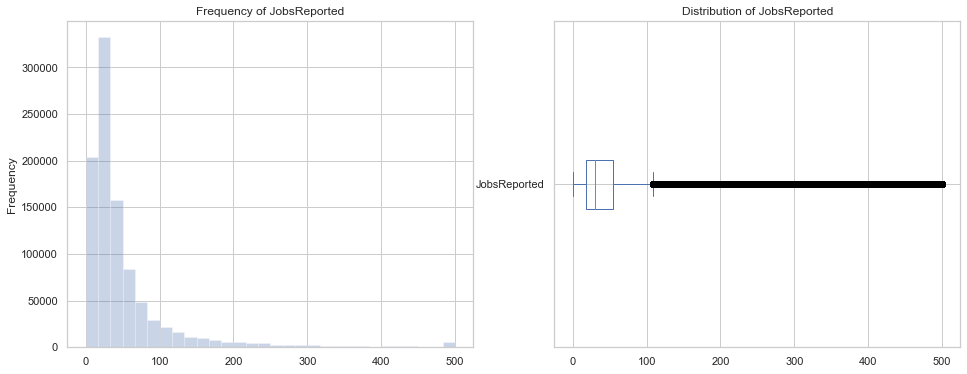

In [68]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df["JobsReported"].plot(
    kind="hist", 
    title="Frequency of JobsReported",
    bins=30,
    alpha=0.3
)
plt.subplot(1,2,2)
df["JobsReported"].plot(
    kind="box",
    vert=False,
    title="Distribution of JobsReported"
)

#### Number of jobs in reported in months

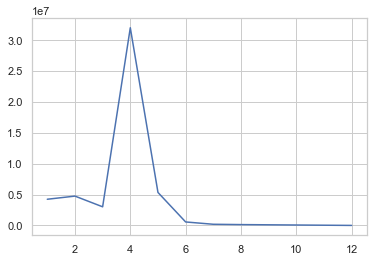

In [69]:
month_df = pd.DataFrame(df.groupby(df['DateApproved'].dt.month)['JobsReported'].sum()).reset_index()
plt.plot(month_df['DateApproved'], month_df['JobsReported'])

#### Number of jobs reported in each state

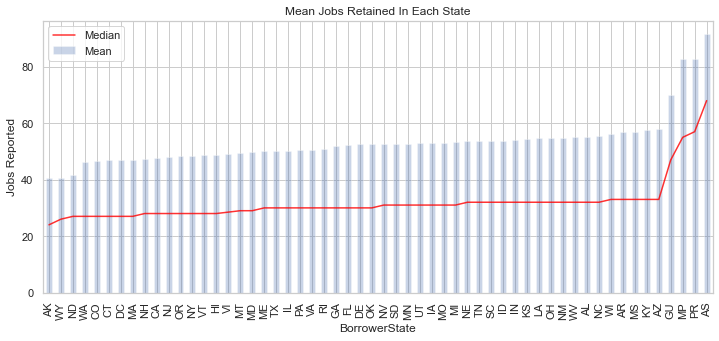

In [70]:
df.groupby("BorrowerState")["JobsReported"].mean().sort_values().plot(
    kind="bar",
    title = "Mean Jobs Retained In Each State",
    alpha = 0.3,
    legend=True,
)

df.groupby("BorrowerState")["JobsReported"].median().sort_values().plot(
    kind="line",
    title = "Mean Jobs Retained In Each State",
    legend=True,
    color="red",
    rot=90,
    alpha=.8,
    figsize=(12,5) # Determines the size 
)
plt.ylabel("Jobs Reported") 
plt.legend(["Median", "Mean"])

#### Jobs Reported Vs Loan Amount

<AxesSubplot:xlabel='JobsReported', ylabel='InitialApprovalAmount'>

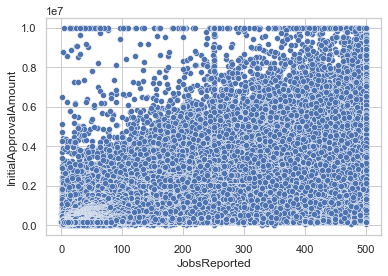

In [71]:
sns.scatterplot(x= 'JobsReported',y = 'InitialApprovalAmount', data =df)

### 18. ProcessingMethod

In [72]:
df['ProcessingMethod'].value_counts()

PPP    676863
PPS    291668
Name: ProcessingMethod, dtype: int64

<AxesSubplot:xlabel='ProcessingMethod', ylabel='count'>

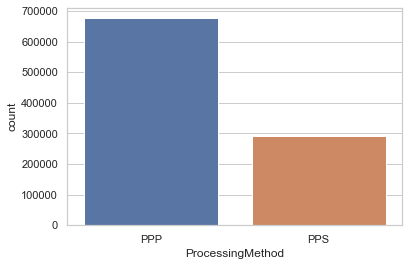

In [73]:
sns.countplot(df['ProcessingMethod'])

Mostly PPP method used to lend money

### 19. Correlation between the number of jobs retained and the loan amount

First, we can compute the correlation between the two variables

In [74]:
from scipy.stats import pearsonr
x=df[df['JobsReported'].notnull()]['CurrentApprovalAmount']
y=df[df['JobsReported'].notnull()]['JobsReported']
pearsonr(x,y)[0]

0.7538270017128461

There is a high correlation betwee these two variables. Let's take a look at the scatter plot for these two variables.

### 20. How the number of approval changes over time

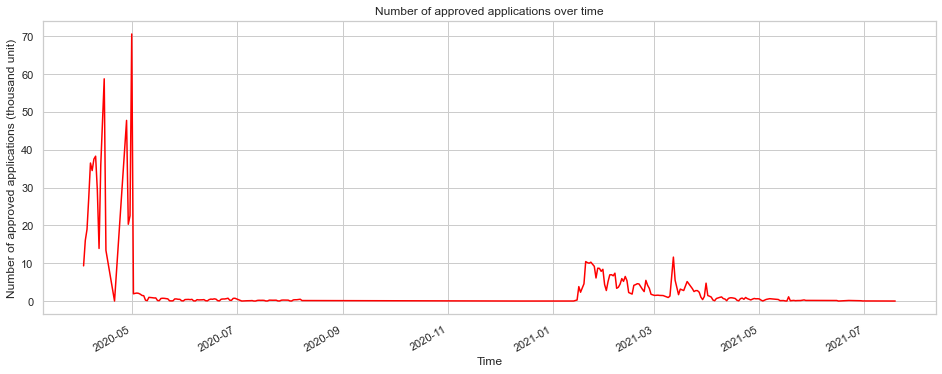

In [75]:
plt.figure(figsize=(16,6))
(df['DateApproved'].value_counts()/10**3).sort_index().plot(kind='line',color='red')
plt.xlabel('Time')
plt.ylabel('Number of approved applications (thousand unit)')
plt.title('Number of approved applications over time')
plt.show()

There are some peaks at start of the year and at the end of May. After May, the number of approvals is stable.

<AxesSubplot:xlabel='DateApproved'>

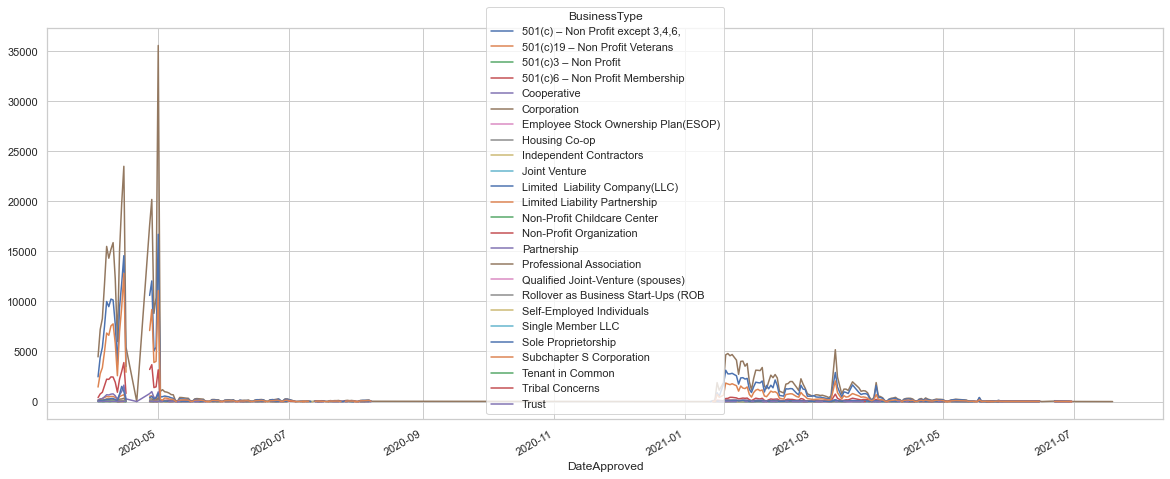

In [76]:
df.groupby('DateApproved')['BusinessType'].value_counts().unstack().plot(kind='line', figsize=(20,8))

#### Look for top 3 banks lends money in which months

In [77]:
((df.groupby('OriginatingLender')['CurrentApprovalAmount'].sum()).sort_values(ascending=False)).head(5)

OriginatingLender
JPMorgan Chase Bank, National Association    2.772046e+10
Bank of America, National Association        2.039737e+10
PNC Bank, National Association               1.340926e+10
Truist Bank                                  1.236673e+10
Manufacturers and Traders Trust Company      1.053829e+10
Name: CurrentApprovalAmount, dtype: float64

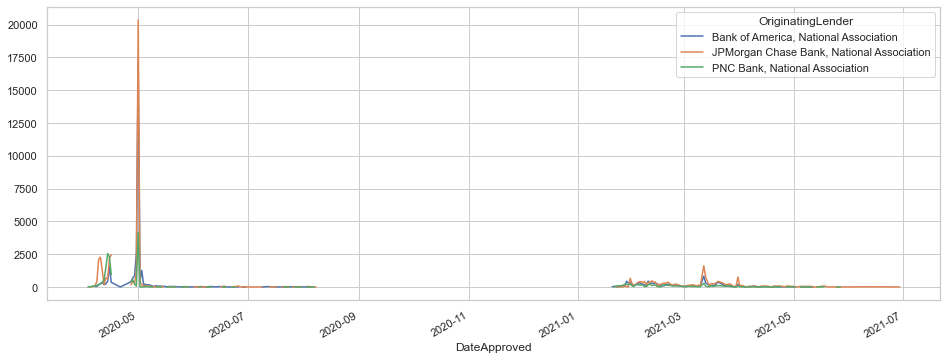

In [78]:
top_3_bank=['JPMorgan Chase Bank, National Association',
            'Bank of America, National Association',
            'PNC Bank, National Association']
top3_bank= df[df['OriginatingLender'].isin(top_3_bank)]
top3_bank.groupby('DateApproved')['OriginatingLender'].value_counts().unstack().plot(kind='line', figsize=(16,6))
plt.show()

'JPMorgan Chase Bank' dominates the other two banks

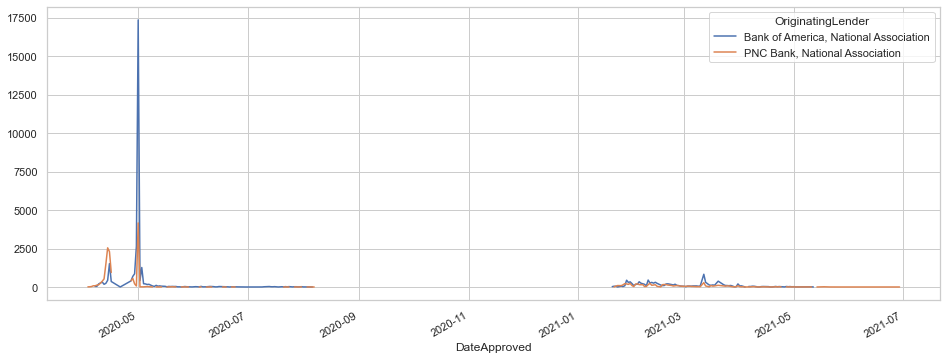

In [79]:
top_2_bank=['Bank of America, National Association',
            'PNC Bank, National Association']
top2_bank= df[df['OriginatingLender'].isin(top_2_bank)]
top2_bank.groupby('DateApproved')['OriginatingLender'].value_counts().unstack().plot(kind='line', figsize=(16,6))
plt.show()

#### High amount of loans were sanctioned in which months

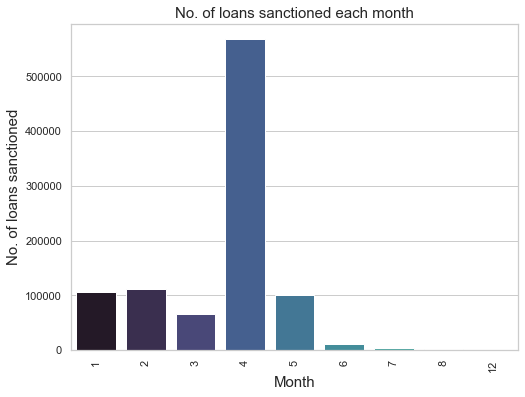

In [80]:
date_df = pd.DataFrame(df.groupby(df['DateApproved'].dt.month)['LoanNumber'].count()).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='DateApproved',y='LoanNumber',data=date_df,palette='mako')
plt.title("No. of loans sanctioned each month",fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.ylabel('No. of loans sanctioned',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### 21. Distribution of PPP for each Project Congressional district

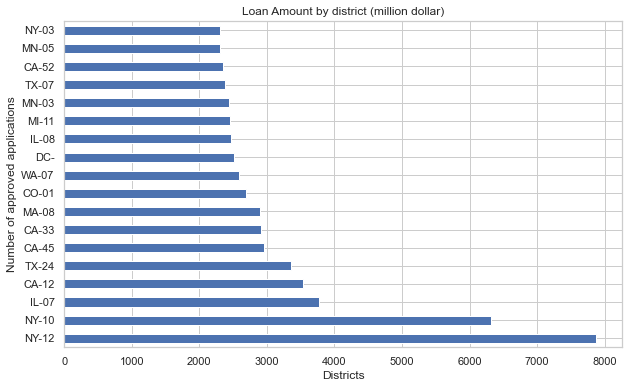

In [81]:
(df.groupby('CD')['CurrentApprovalAmount'].sum()/10**6).sort_values(ascending=False).head(18).plot(kind='barh', figsize=(10,6))
plt.xlabel('Districts')
plt.ylabel('Number of approved applications')
plt.title('Loan Amount by district (million dollar)')
plt.show()

### 22. Project States

Text(0.5, 1.0, 'Average loan amount borrowed with Projects State')

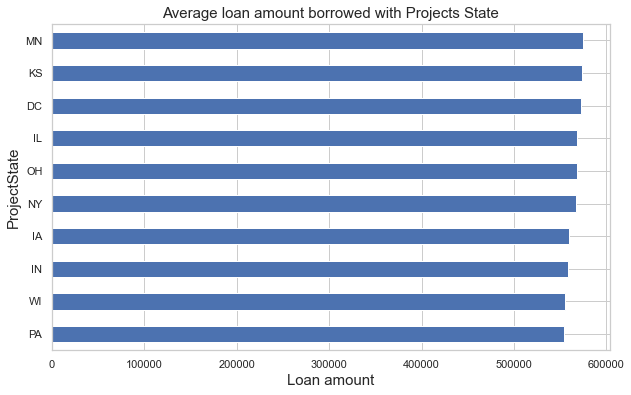

In [82]:
plt.figure(figsize=(10,6))
(df.groupby("ProjectState")["CurrentApprovalAmount"].mean().sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('ProjectState',fontsize=15)
plt.title('Average loan amount borrowed with Projects State',fontsize=15)

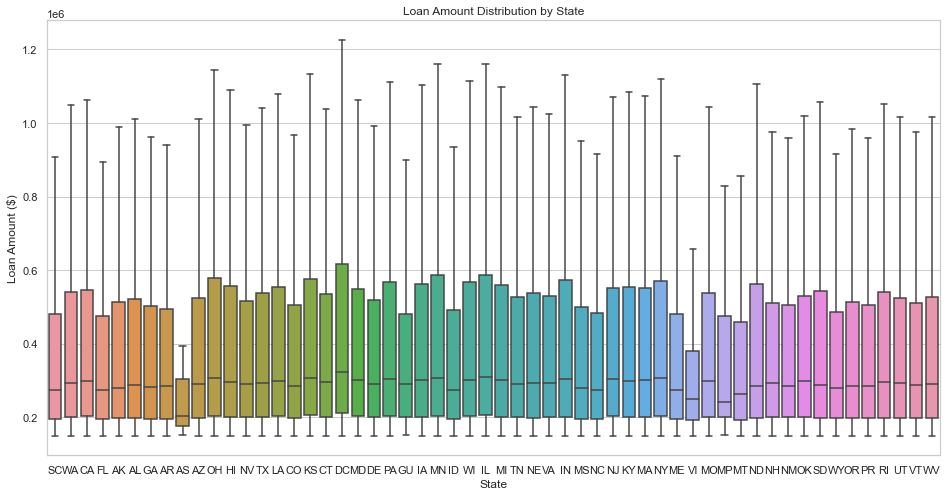

In [83]:
# Create a boxplot of loan amounts by state
plt.figure(figsize=(16,8))
sns.boxplot(x='ProjectState', y='CurrentApprovalAmount', data=df, showfliers=False)
plt.title('Loan Amount Distribution by State')
plt.xlabel('State')
plt.ylabel('Loan Amount ($)')
plt.show()

### 23. Money borrowed with different ethnicity

Text(0.5, 1.0, 'Average loan amount borrowed with ethnicity')

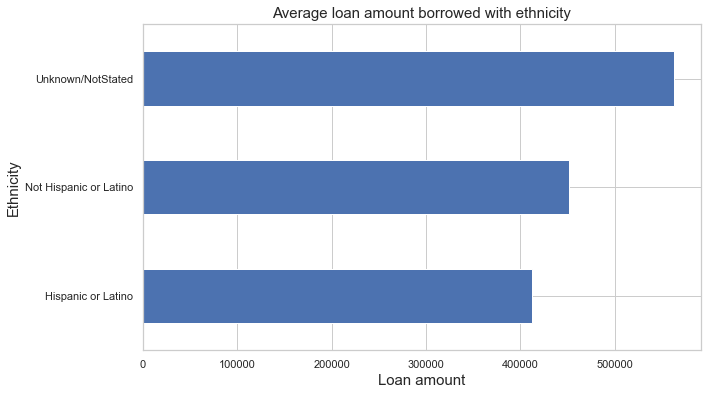

In [84]:
# Check the loan amount distribution by borrower's ethnicity
plt.figure(figsize=(10,6))
(df.groupby("Ethnicity")["CurrentApprovalAmount"].mean().sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('Ethnicity',fontsize=15)
plt.title('Average loan amount borrowed with ethnicity',fontsize=15)

In [85]:
# Check the loan approval rate by borrower ethnicity
ethnicity_counts = df["Ethnicity"].value_counts()
approval_counts = df[df["LoanStatus"] == "Paid in Full"].groupby("Ethnicity")["LoanStatus"].count()
approval_rates = approval_counts / ethnicity_counts
print(approval_rates)

Hispanic or Latino        0.932589
Not Hispanic or Latino    0.963344
Unknown/NotStated         0.961234
dtype: float64


### 24. Money borrowed with different race

Text(0.5, 1.0, 'Average loan amount borrowed with race')

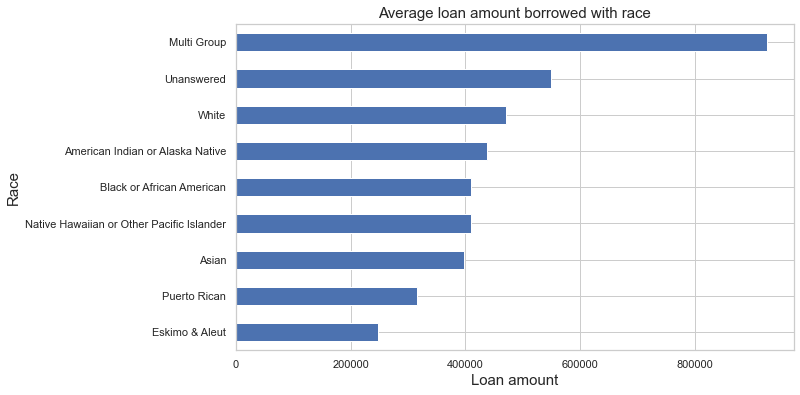

In [86]:
# Check the loan amount distribution by borrower ethnicity
plt.figure(figsize=(10,6))
(df.groupby("Race")["CurrentApprovalAmount"].mean().sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('Race',fontsize=15)
plt.title('Average loan amount borrowed with race',fontsize=15)

In [87]:
# Check the loan approval rate by borrower race
race_counts = df["Race"].value_counts()
approval_counts = df[df["LoanStatus"] == "Paid in Full"].groupby("Race")["LoanStatus"].count()
approval_rates = approval_counts / race_counts
print(approval_rates)

American Indian or Alaska Native             0.938766
Asian                                        0.942833
Black or African American                    0.791272
Eskimo & Aleut                               1.000000
Multi Group                                  1.000000
Native Hawaiian or Other Pacific Islander    0.922137
Puerto Rican                                 0.935484
Unanswered                                   0.962130
White                                        0.967570
dtype: float64


### 25. Money borrowed with veteran status

Text(0.5, 1.0, 'Average loan amount borrowed with Veteran')

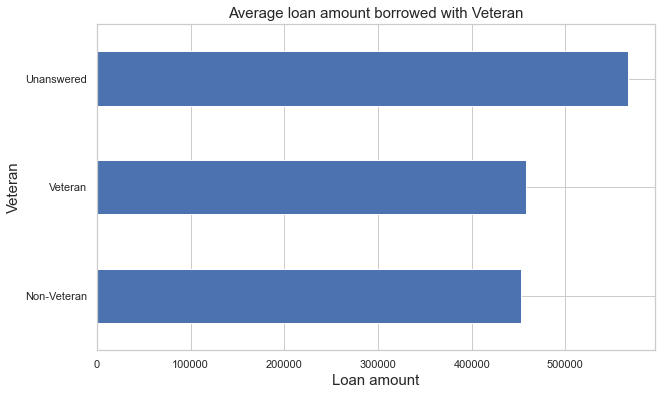

In [88]:
# Check the loan amount distribution by borrower ethnicity
plt.figure(figsize=(10,6))
(df.groupby("Veteran")["CurrentApprovalAmount"].mean().sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('Veteran',fontsize=15)
plt.title('Average loan amount borrowed with Veteran',fontsize=15)

### 26. Average loan amount by borrower NAICS code

Text(0.5, 1.0, 'Average loan amount borrowed with NAICSCode')

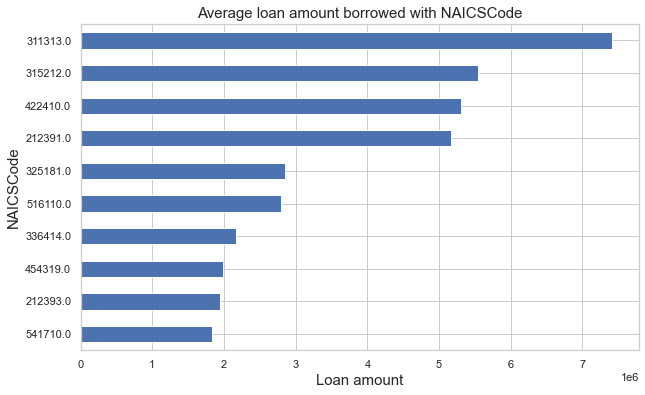

In [89]:
# Check the loan amount distribution by borrower ethnicity
plt.figure(figsize=(10,6))
(df.groupby("NAICSCode")["CurrentApprovalAmount"].mean().sort_values(ascending=False)).head(10).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('NAICSCode',fontsize=15)
plt.title('Average loan amount borrowed with NAICSCode',fontsize=15)

### 27. Average loan amount by borrower SBA Office Code

Text(0.5, 1.0, 'Average loan amount borrowed with SBAOfficeCode')

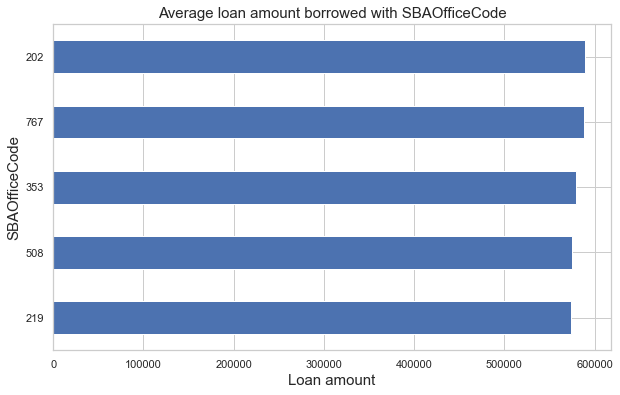

In [90]:
# Check the loan amount distribution by borrower ethnicity
plt.figure(figsize=(10,6))
(df.groupby("SBAOfficeCode")["CurrentApprovalAmount"].mean().sort_values(ascending=False)).head(5).sort_values().plot(kind='barh')
plt.xlabel('Loan amount',fontsize=15)
plt.ylabel('SBAOfficeCode',fontsize=15)
plt.title('Average loan amount borrowed with SBAOfficeCode',fontsize=15)

### 28. Ethnicity and gender wise amount approved

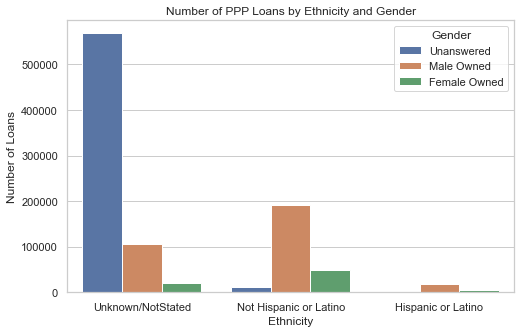

In [91]:
plt.figure(figsize=(8,5))

sns.countplot(x='Ethnicity', data=df, hue='Gender')
plt.title('Number of PPP Loans by Ethnicity and Gender')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Loans')
plt.show()

### 29. Loan amount distribution for loans above and below $150,000

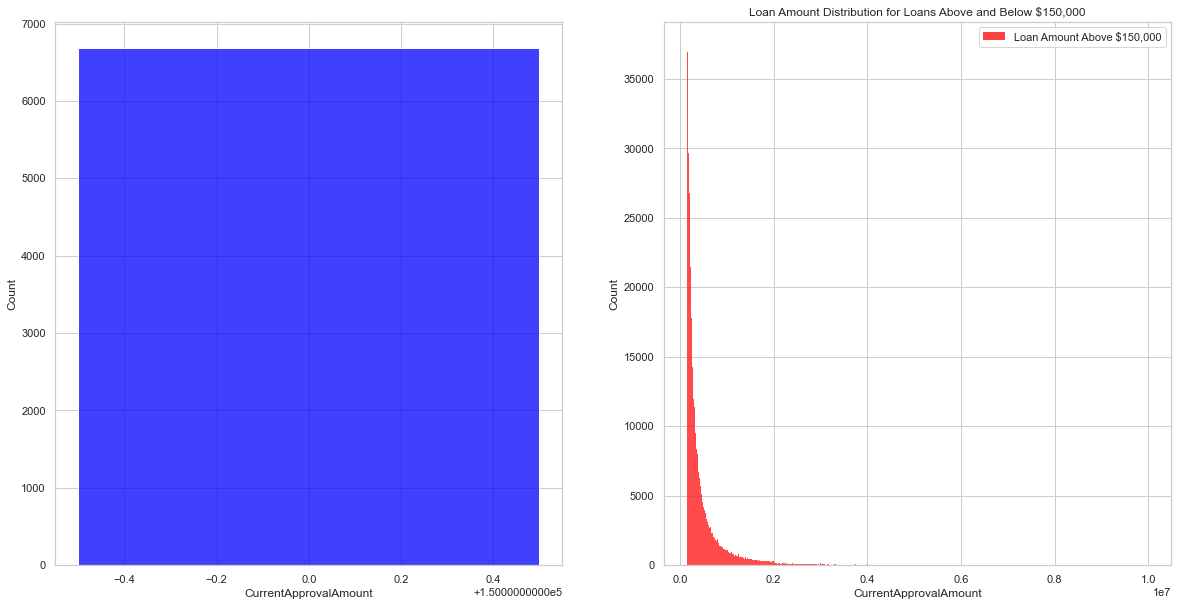

In [92]:
# Loan amount distribution for loans above and below $150,000
loan_below_150k = df[df['CurrentApprovalAmount'] <= 150000]['CurrentApprovalAmount']
loan_above_150k = df[df['CurrentApprovalAmount'] > 150000]['CurrentApprovalAmount']
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(loan_below_150k, color='blue', label='Loan Amount Below $150,000')
plt.subplot(1,2,2)
sns.histplot(loan_above_150k, color='red', label='Loan Amount Above $150,000')
plt.legend()
plt.title('Loan Amount Distribution for Loans Above and Below $150,000')
plt.show()

### 30. Data grouped by project state and loan amount to find loan amount distribution

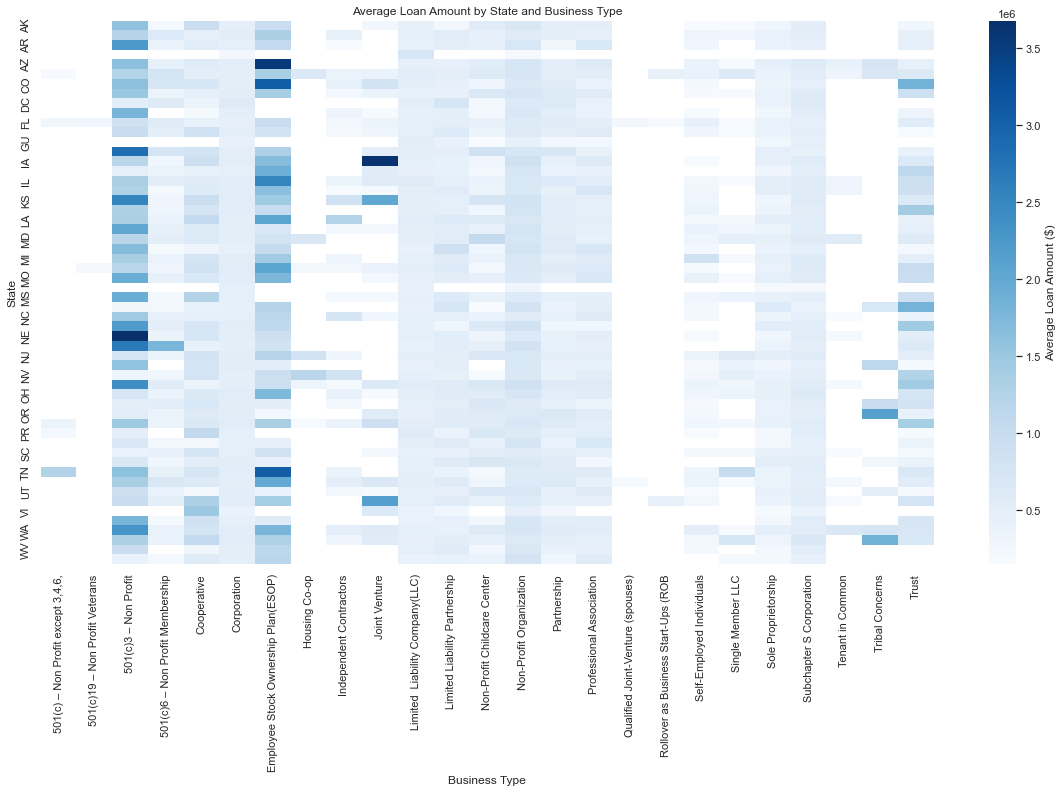

In [93]:
# Group by State and Business Type and calculate the average loan amount
state_business_type_avg_loan = df.groupby(['ProjectState', 'BusinessType'])['CurrentApprovalAmount'].mean().reset_index()

pivot_state_business_type_avg_loan = state_business_type_avg_loan.pivot(index='ProjectState', columns='BusinessType', values='CurrentApprovalAmount')

plt.figure(figsize=(20,10))
sns.heatmap(pivot_state_business_type_avg_loan, cmap='Blues', fmt='.0f', cbar_kws={'label': 'Average Loan Amount ($)'})
plt.title('Average Loan Amount by State and Business Type')
plt.xlabel('Business Type')
plt.ylabel('State')
plt.show()

### 31. Data grouped by project state and loan amount to find loan lending frequency

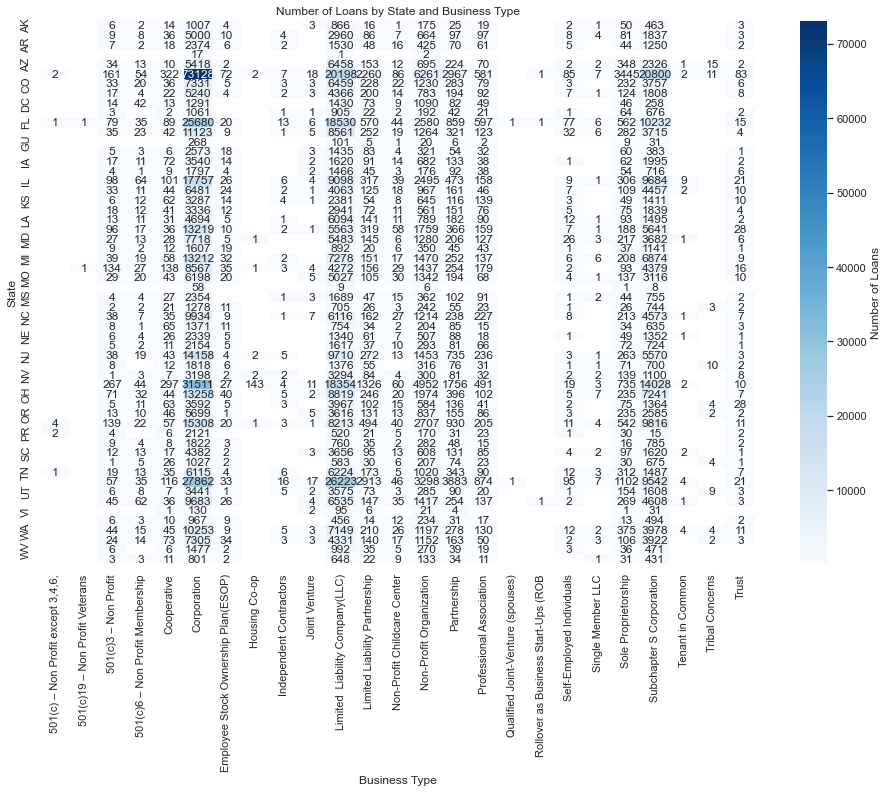

In [94]:
# Group by State and Business Type and count the number of loans
state_business_type_loan_count = df.groupby(['ProjectState', 'BusinessType'])['LoanNumber'].count().reset_index()

pivot_state_business_type_loan_count = state_business_type_loan_count.pivot(index='ProjectState', columns='BusinessType', values='LoanNumber')

plt.figure(figsize=(16,10))
sns.heatmap(pivot_state_business_type_loan_count, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Loans'})
plt.title('Number of Loans by State and Business Type')
plt.xlabel('Business Type')
plt.ylabel('State')
plt.show()

### 32. Loan distribution for loans with and without forgiveness

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Loan Distribution')

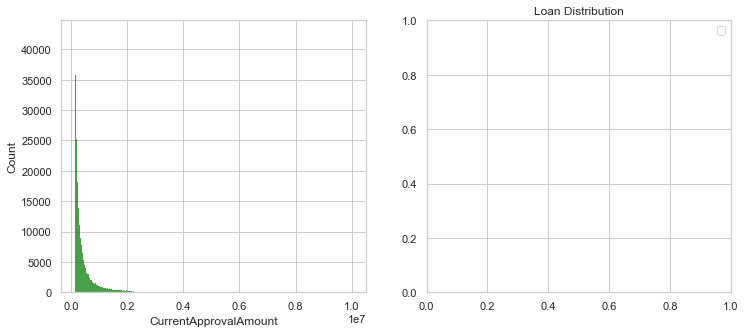

In [95]:
# Loan distribution for loans with and without forgiveness
loan_with_forgiveness = df[df['ForgivenessAmount'] > 0]['CurrentApprovalAmount']
loan_without_forgiveness = df[df['ForgivenessAmount'] == 0]['CurrentApprovalAmount']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(loan_with_forgiveness, color='green', label='Loan with Forgiveness')
plt.subplot(1,2,2)
sns.histplot(loan_without_forgiveness, color='orange', label='Loan without Forgiveness')
plt.legend()
plt.title('Loan Distribution')

In [96]:
# Check the loan approval rate by borrower ethnicity and gender
ethnicity_gender_counts = df.groupby(["Ethnicity", "Gender"])["Gender"].count()
ethnicity_gender_approval_counts = df[df["LoanStatus"] == "Paid in Full"].groupby(["Ethnicity", "Gender"])["LoanStatus"].count()
ethnicity_gender_approval_rates = ethnicity_gender_approval_counts / ethnicity_gender_counts
print(ethnicity_gender_approval_rates)

Ethnicity               Gender      
Hispanic or Latino      Female Owned    0.925382
                        Male Owned      0.934398
                        Unanswered      0.936772
Not Hispanic or Latino  Female Owned    0.961091
                        Male Owned      0.963888
                        Unanswered      0.963692
Unknown/NotStated       Female Owned    0.963876
                        Male Owned      0.967465
                        Unanswered      0.959977
dtype: float64


In [97]:
# Check the loan approval rate by borrower race and ethnicity
race_ethnicity_counts = df.groupby(["Race", "Ethnicity"])["Ethnicity"].count()
race_ethnicity_approval_counts = df[df["LoanStatus"] == "Paid in Full"].groupby(["Race", "Ethnicity"])["LoanStatus"].count()
race_ethnicity_approval_rates = race_ethnicity_approval_counts / race_ethnicity_counts
race_ethnicity_approval_rates = race_ethnicity_approval_rates.sort_values(ascending=False)
print(race_ethnicity_approval_rates)

Race                                       Ethnicity             
Eskimo & Aleut                             Unknown/NotStated         1.000000
Multi Group                                Unknown/NotStated         1.000000
Puerto Rican                               Not Hispanic or Latino    1.000000
                                           Hispanic or Latino        1.000000
White                                      Unknown/NotStated         0.971478
Unanswered                                 Not Hispanic or Latino    0.970804
White                                      Not Hispanic or Latino    0.969808
Unanswered                                 Unknown/NotStated         0.961247
American Indian or Alaska Native           Unknown/NotStated         0.959285
Asian                                      Unknown/NotStated         0.945048
Unanswered                                 Hispanic or Latino        0.944476
Asian                                      Not Hispanic or Latino    0.94359

### 33. Relationship between loan amount and jobs reported

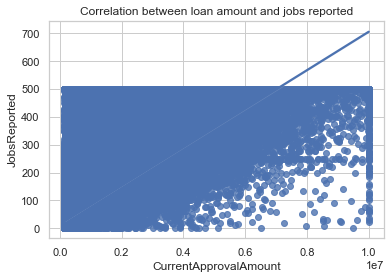

In [98]:
# Check the relationship between loan amount and jobs reported
sns.regplot(x=df['CurrentApprovalAmount'],y=df['JobsReported'])
plt.title('Correlation between loan amount and jobs reported')
plt.show()

### 34. Relationship between loan amount and forgiveness amount

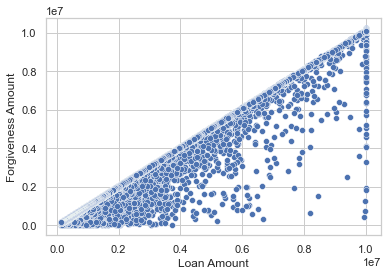

In [99]:
# Check the relationship between loan amount and forgiveness amount
sns.scatterplot(data=df, x="CurrentApprovalAmount", y="ForgivenessAmount")
plt.xlabel("Loan Amount")
plt.ylabel("Forgiveness Amount")
plt.show()

### Find total number of loans approved in each month and use it forTime Series Forecasting to predict how many loans would be approved in the upcoming months

In [100]:
# loans approved each month
month_df = pd.DataFrame(df.groupby(df['DateApproved'].dt.week)['LoanNumber'].count()).reset_index()
month_df = month_df.rename(columns ={'DateApproved':'Month','LoanNumber':'No. of Loans Sanctioned'})
month_df.head()

,Month,No. of Loans Sanctioned
0,2,6586
1,3,45392
2,4,53176
3,5,39195
4,6,33368


In [101]:
df_forcast = df[['DateApproved','LoanNumber']]

In [102]:
month_data = df_forcast.resample('M',on='DateApproved').count()

In [103]:
month_data.drop('DateApproved',axis=1,inplace=True)
month_data = month_data.rename(columns ={'LoanNumber':'No. of Loans Sanctioned'})
month_data= month_data.reset_index()

In [104]:
month_data.rename(columns={'DateApproved':'ds','No. of Loans Sanctioned':'y'},inplace=True)
month_data

,ds,y
0,2020-04-30,548337
1,2020-05-31,93965
2,2020-06-30,11289
3,2020-07-31,3813
4,2020-08-31,2038
5,2020-09-30,0
6,2020-10-31,0
7,2020-11-30,0
8,2020-12-31,4
9,2021-01-31,105154


In [105]:
month_data.index = month_data['ds']
month_data.drop('ds',axis=1,inplace=True)
month_data.head()

,y
ds,
2020-04-30,548337
2020-05-31,93965
2020-06-30,11289
2020-07-31,3813
2020-08-31,2038


In [106]:
month_data.shape

(16, 1)

### 1. Simple moving average method

In [107]:
train_len = 11
train = month_data[0:train_len] # first 120 months as training set
test = month_data[train_len:]

In [108]:
y_hat_sma = month_data.copy()
ma_window = 16
y_hat_sma['sma_forecast'] = month_data['y'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['y'][train_len-1]

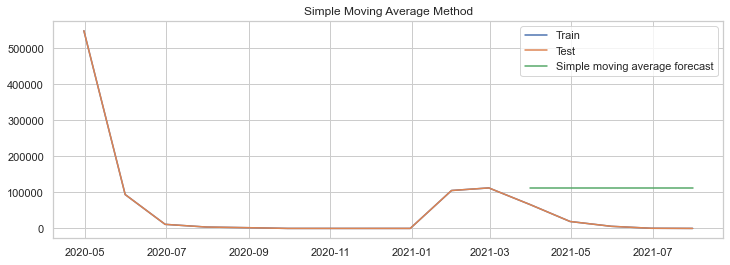

In [109]:
plt.figure(figsize=(12,4))
plt.plot(month_data['y'], label='Train')
plt.plot(month_data['y'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
rmse = np.sqrt(mean_squared_error(test['y'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_sma['sma_forecast'][train_len:])/test['y'])*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,97258.44,2252786.66


### 2. Simple exponential smoothing

In [112]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['y'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

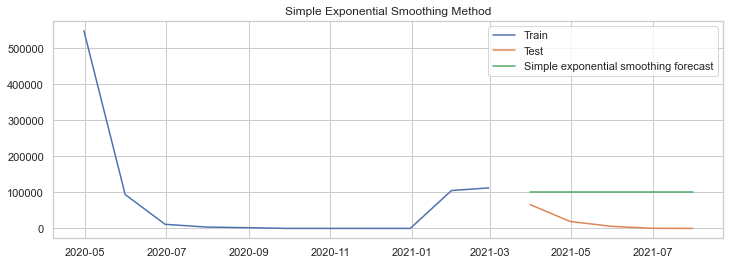

In [113]:
plt.figure(figsize=(12,4))
plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [114]:
rmse = np.sqrt(mean_squared_error(test['y'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_ses['ses_forecast'])/test['y'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Simple moving average forecast,97258.44,2252786.66
0,Simple exponential smoothing forecast,86672.27,2032213.25


### 3. Holt's method with trend

In [115]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 548337.0, 'initial_trend': -454372.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


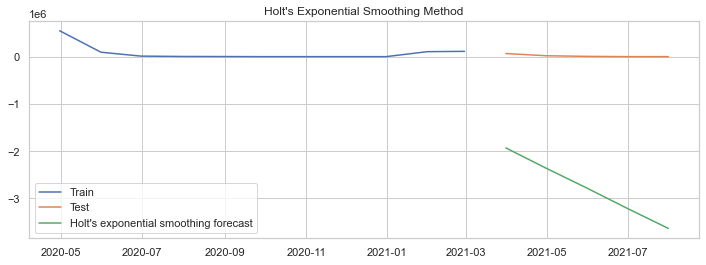

In [116]:
plt.figure(figsize=(12,4))
plt.plot( train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [117]:
rmse = np.sqrt(mean_squared_error(test['y'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['y']-y_hat_holt['holt_forecast'])/test['y'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,97258.44,2252786.66
0,Simple exponential smoothing forecast,86672.27,2032213.25
0,Holt's exponential smoothing method,2862156.21,72896431.81


### Using prophet library

#### My local machine not able to install pystan and fbprophet

--------------------------------------------------------------------------------------------

## Insighs found from analysis

* Total money currently approved is 485.831 Billion.
* Most of the loans approved in 2020 than 2021.
* Almost 99% loans are paid fully.
* People don’t like to mention their gender, but those answered, male are more in number than females.
* Almost 95% of the businesses are existing over more than 2 years, while startups are very negligible.
* Rural businesses are almost 15% in frequency but received 45% lended amount by bank. This shows rural business impacted more than urban.
* Loan amount right skewed distribution.
* Loan terms are about 25 years and 55 years only.
* State wise analysis - California received the most money followed by New york and Texas. Highest average money received by Minnesota and Kansas. 
* City wise analysis - NewYork received the most money followed by Houston. Highest average money received by Gardenda and Peach Glen.
* Business Types - Frequency of receiving money is more for Corporation and Limited Liability Company(LLC). '501(c)19 – Non Profit Veterans','Housing Co-op ' and '501(c) – Non Profit except 3,4,6' received highest average money.While 'Employee stock ownership','Tribal concerns' and '501(c)3 - Non-Profit' have higher median values. And '501(c) – Non Profit except 3,4,6' , 'Joint Venture', 'Tribal Concerns' and 'Tenant in Common' have higher loan approval rate.
* People don’t like to mention their Race/Ethnicity/Veteran.
* JPMorgan Chase bank and Bank of America are the biggest banks to give loans to business followed by Truist Bank and PNC bank. But most of the money was given by The First National Bank of  Sparta.
* Jobs reported - Most jobs reported for AS,PR and MP.
* Date approved - There are some peaks at start of the year and at the end of May. After May, the number of approvals is stable. It seems top 3 banks are not approving loans from August-2020 to Jan-2021.
* Project Congressional district - Most money lended in NY-12 and NY-10.
* Project State - AS and VI have very median value of loan amount while others state have almost same median values.
* Average money lended to peoples with unanswered ethnicity but approval rate is high for Hispanic or Latino.
* We can see that loans below 150,000 have a higher frequency of occurrence, while loans above 150,000 have a wider range of loan amounts.
* When data group by State and Business Type and count the number of loans it is found that Corporation field in AZ,TN and NV, Limited Liability Company(LLC) in TN,AZ received highest amount of loans frequency
* When Data grouped by project state and loan amount to find loan amount distribution, it is found that 1) 501(c)3 - Non profit in NE    2) ESOP in AZ    3) Joint veture in IA have received most money
* Relationship between Loan amount & Forgiveness maount - There is a positive correlation between the approved loan amount and the forgiveness amount. However, there are also many outliers where the forgiveness amount is higher or lower than expected based on the approved loan amount
* Distribution of jobs reported - Most of the businesses reported less than 100 jobs